In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
cabin_column = data['Cabin'].value_counts()

In [7]:
cabin_column.index

Index(['G6', 'C23 C25 C27', 'B96 B98', 'C22 C26', 'E101', 'F33', 'D', 'F2',
       'D36', 'D20',
       ...
       'B30', 'C87', 'C32', 'B71', 'D19', 'B94', 'B41', 'E36', 'C45', 'D11'],
      dtype='object', length=147)

In [8]:
(204/891)*100 #dropping Cabin column since its having more none values
#cabin column having only 22% rows having valid data so i decided to drop this column


22.895622895622896

In [9]:
data.drop('Cabin', axis=1, inplace=True)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
data['Age'].mean()

29.69911764705882

In [13]:
data['Age'].median()

28.0

###  Data Insight class wise

In [14]:
class_data = data['Pclass'].value_counts()
class_id = class_data.index
class_values_arr = class_data.values

In [15]:
class_values = (class_values_arr/sum(class_values_arr))*100
class_values

array([55.10662177, 24.24242424, 20.65095398])

([<matplotlib.patches.Wedge at 0x170df12b848>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762456817722, -0.9714243710361642, '1'),
  Text(0.876511052325622, -0.664626492965057, '2')])

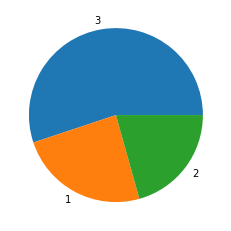

In [16]:
plt.pie(class_values, labels=class_id)

#### class wise survived and not survived people insight

In [17]:
class_3 = data.loc[data['Pclass'] == 3]
class_3_survived = class_3.loc[class_3['Survived'] == 1]
class_3_not_survived = class_3.loc[class_3['Survived'] == 0]
print(len(class_3_survived))
print(len(class_3_not_survived))

119
372


In [18]:
class_2 = data.loc[data['Pclass']==2]
class_2_survived = class_2.loc[class_2['Survived']==1]
class_2_not_survived = class_2.loc[class_2['Survived'] ==0]
print(len(class_2_survived))
print(len(class_2_not_survived))

87
97


In [19]:
class_1 = data.loc[data['Pclass']==1]
class_1_survived = class_1.loc[class_1['Survived']==1]
class_1_not_survived = class_1.loc[class_1['Survived'] ==0]
print(len(class_1_survived))
print(len(class_1_not_survived))

136
80


In [20]:
survive_value_list = (len(class_1_survived), len(class_2_survived), len(class_3_survived))
not_survive_value_list = (len(class_1_not_survived), len(class_2_not_survived), len(class_3_not_survived))

##### Bar chart

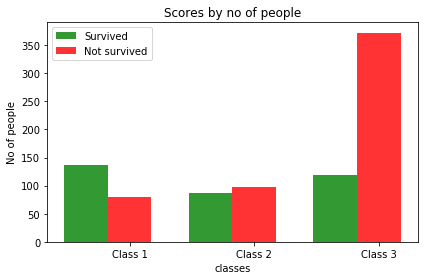

In [21]:
no_of_classes = 3
fig, ax = plt.subplots()
index = np.arange(no_of_classes)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, survive_value_list, bar_width,
alpha=opacity,
color='g',
label='Survived')

rects2 = plt.bar(index + bar_width, not_survive_value_list, bar_width,
alpha=opacity,
color='r',
label='Not survived')

plt.xlabel('classes')
plt.ylabel('No of people')
plt.title('Scores by no of people')
plt.xticks(index + bar_width, ('Class 1', 'Class 2', 'Class 3'))
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# X = data.drop('Survived', axis=1)
# y = data[['Survived']]

In [24]:
data['Age'].isna().sum()

177

In [25]:
data['Age'].mean()

29.69911764705882

In [26]:
data.iloc[888]

PassengerId                                         889
Survived                                              0
Pclass                                                3
Name           Johnston, Miss. Catherine Helen "Carrie"
Sex                                              female
Age                                                 NaN
SibSp                                                 1
Parch                                                 2
Ticket                                       W./C. 6607
Fare                                              23.45
Embarked                                              S
Name: 888, dtype: object

In [27]:
data['Age'].fillna(29, inplace=True)
data.iloc[888]

PassengerId                                         889
Survived                                              0
Pclass                                                3
Name           Johnston, Miss. Catherine Helen "Carrie"
Sex                                              female
Age                                                  29
SibSp                                                 1
Parch                                                 2
Ticket                                       W./C. 6607
Fare                                              23.45
Embarked                                              S
Name: 888, dtype: object

In [28]:
data['Age'].isna().any()

False

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [30]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
len(data['Embarked'])

891

In [32]:
data.loc[(data['Embarked'] != 'S') & (data['Embarked'] != 'C') & (data['Embarked'] != 'Q')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [33]:
data.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Embarked                       NaN
Name: 61, dtype: object

In [34]:
data['Embarked'].isna().any()

True

In [35]:
data['Embarked'].mode()

0    S
dtype: object

In [36]:
row_61 = data.iloc[61]
row_61

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Embarked                       NaN
Name: 61, dtype: object

In [37]:
row_61['Embarked'] = 'S'

c:\users\prasad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
row_61

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Embarked                         S
Name: 61, dtype: object

In [39]:
data.iloc[61]['Embarked'] = 'S'

c:\users\prasad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
data.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Embarked                       NaN
Name: 61, dtype: object

In [41]:
data['Embarked'].fillna('S', inplace=True)

In [42]:
data.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Embarked                         S
Name: 61, dtype: object

In [43]:
data.dropna(inplace=True) ### dropping rows which having Nan values

In [44]:
len(data)

891

In [45]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [46]:
X = data.drop('Survived', axis=1)
y = data[['Survived']]

In [47]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train))
print(len(X_test))

623
268


In [63]:
print(X_train.columns)
print(X_test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [70]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
126,127,3,"McMahon, Mr. Martin",male,29.0,0,0,370372,7.750,Q
616,617,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.400,S
129,130,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,S
522,523,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.225,C
342,343,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.000,S


In [71]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
573,574,3,"Kelly, Miss. Mary",female,29.0,0,0,14312,7.7500,Q
308,309,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,C
874,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C
181,182,2,"Pernot, Mr. Rene",male,29.0,0,0,SC/PARIS 2131,15.0500,C
127,128,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,S


In [72]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
126,127,3,"McMahon, Mr. Martin",male,29.0,0,0,370372,7.750,Q
616,617,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.400,S
129,130,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,S
522,523,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.225,C
342,343,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.000,S


In [73]:
X_train.drop('Name', inplace=True, axis=1)


c:\users\prasad\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
X_train.drop('Ticket', inplace=True, axis=1)

In [91]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
573,574,3,female,29.0,0,0,7.7500,Q
308,309,2,male,30.0,1,0,24.0000,C
874,875,2,female,28.0,1,0,24.0000,C
181,182,2,male,29.0,0,0,15.0500,C
127,128,3,male,24.0,0,0,7.1417,S


In [79]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 573 to 465
Data columns (total 8 columns):
PassengerId    268 non-null int64
Pclass         268 non-null int64
Sex            268 non-null object
Age            268 non-null float64
SibSp          268 non-null int64
Parch          268 non-null int64
Fare           268 non-null float64
Embarked       268 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 18.8+ KB


In [106]:
from sklearn.linear_model import LogisticRegression

In [80]:
x_train = pd.get_dummies(X_train)
y_train = pd.get_dummies(X_test)
print(len(x_train.columns))
print(len(y_train.columns))

11
11


In [81]:
x_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
126,127,3,29.0,0,0,7.750,0,1,0,1,0
616,617,3,34.0,1,1,14.400,0,1,0,0,1
129,130,3,45.0,0,0,6.975,0,1,0,0,1
522,523,3,29.0,0,0,7.225,0,1,1,0,0
342,343,2,28.0,0,0,13.000,0,1,0,0,1


In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
log_reg  = LogisticRegression()
log_reg.fit(x_train, y_train)

ValueError: bad input shape (268, 11)

In [85]:
y_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
573,574,3,29.0,0,0,7.7500,1,0,0,1,0
308,309,2,30.0,1,0,24.0000,0,1,1,0,0
874,875,2,28.0,1,0,24.0000,1,0,1,0,0
181,182,2,29.0,0,0,15.0500,0,1,1,0,0
127,128,3,24.0,0,0,7.1417,0,1,0,0,1
